<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [ ]:
# Find the dataset described above
# Hint: search for it through the UCI Machine Learning Repository

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

import seaborn as sns 

from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read data in pandas
df = pd.read_csv('transfusion.csv')
# Check data has loaded correctly
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent the absence of data)

In [3]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [4]:
df.corr()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
whether he/she donated blood in March 2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


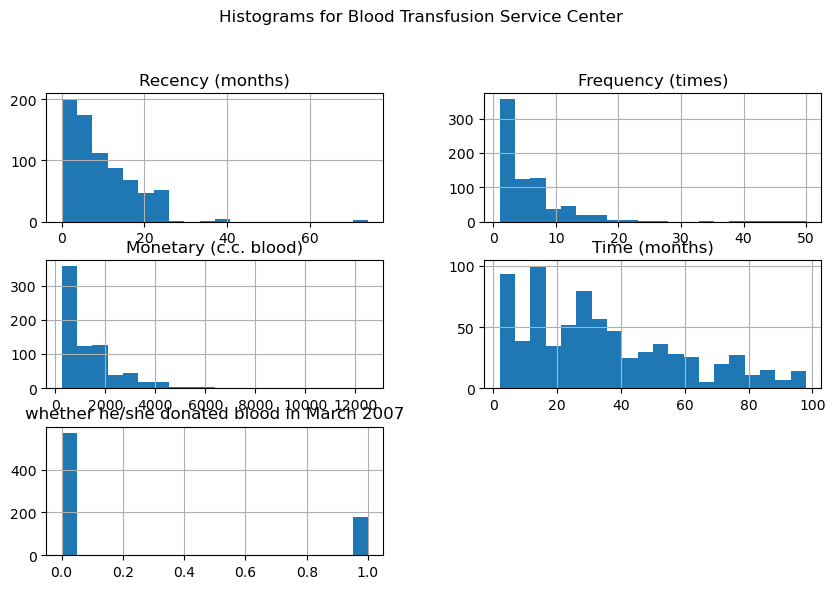

In [5]:
df.hist(figsize=(10, 6), bins=20)  # Adjust figsize and bins as needed
plt.suptitle('Histograms for Blood Transfusion Service Center', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

In [6]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


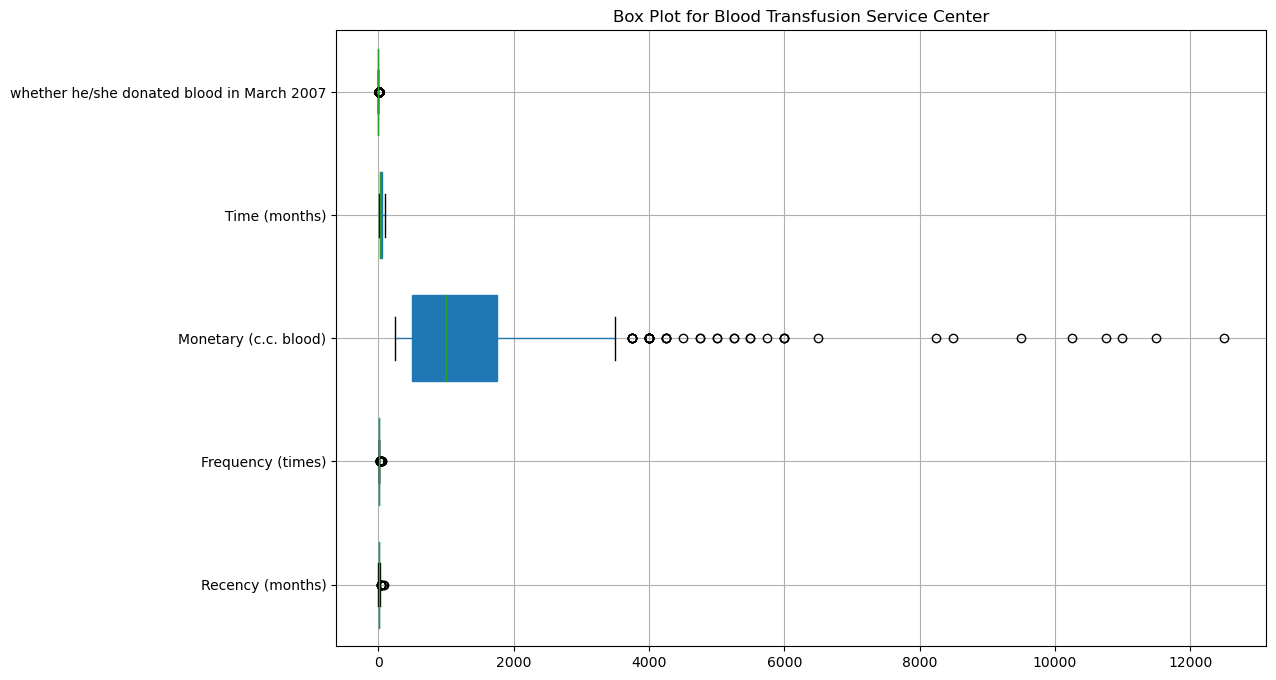

In [7]:
# Perform EDA by investigating each of the points above

# Specify the numeric columns for box plot
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a box plot for numeric columns
plt.figure(figsize=(12, 8))
df[numeric_columns].boxplot(sym='o', vert=False, patch_artist=True, widths=0.7)
plt.title('Box Plot for Blood Transfusion Service Center')
plt.show()

In [8]:
#updated name of columns
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Donated_Blood']
df.head()

,Recency,Frequency,Monetary,Time,Donated_Blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalization** (if possible or necessary)
    - **Feature Engineer** (if useful or necessary)

In [ ]:
# Filter/subset/clean the data according to your EDA findings

#above

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [ ]:
#review questions

#What are the input variables (features)? (4 features in data set)
#Is there an output variable (label)? (donated blood march of 2007, thats we are perdicting )
#If there is an output variable: (whether he/she donated blood in March 2007 )
 #supervided modleding 
#What type of Modelling is it? supervided 
#What type of Modelling is it?
# Classification (binary)
    #1-0 class variable

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [9]:
# Split your data
x = df.drop('Donated_Blood',axis=1)
x.head()

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [10]:
y = df['Donated_Blood']
y

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: Donated_Blood, Length: 748, dtype: int64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [15]:
# Choose a model or models
model = RandomForestClassifier(random_state=1)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

# Step 9: Fit the Model

In [ ]:
# Fit model
#above

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyze, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [16]:
# Evaluate model against training set

def show_summary_report(actual, prediction):

 

    if isinstance(actual, pd.Series):

        actual = actual.values.astype(int)

    prediction = prediction.astype(float)

    prediction_int = np.round(prediction)

 

    print('Accuracy : %.4f [TP / N]         Best: 1, Worst: 0' %

          accuracy_score(actual, prediction_int))

    msg = '           Proportion of predicted labels that match the true labels.'

    print(msg)

    print('Precision: %.4f [TP / (TP + FP)] Best: 1, Worst: 0' %

          precision_score(actual, prediction_int))

    msg = '           Not to label a negative sample as positive.'

    print(msg)

    print('Recall   : %.4f [TP / (TP + FN)] Best: 1, Worst: 0' %

          recall_score(actual, prediction_int))
    
    msg = '           Find all the positive samples.'

    print(msg)

    print('ROC AUC  : %.4f                  Best: 1, Worst: < 0.5' %

          roc_auc_score(actual, prediction))

    print('-' * 80)

    print('TP: True Positives, FP: False Positives,')

    print('TN: True Negatives, FN: False Negatives,')

    print('N: Number of samples')

 

    # Confusion Matrix

    mat = confusion_matrix(actual, prediction_int)

 

    # Precision/Recall

    precision, recall, _ = precision_recall_curve(actual, prediction)

 

    # Compute ROC curve and ROC area

    fpr, tpr, _ = roc_curve(actual, prediction)

    roc_auc = auc(fpr, tpr)
    
    # plot

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)

 

    # Confusion Matrix

    sns.heatmap(mat.T, square=True, annot=True, fmt='d',

                cbar=False, cmap='Blues', ax=ax[0])

 

    ax[0].set_title('Confusion Matrix')

    ax[0].set_xlabel('True label')

    ax[0].set_ylabel('Predicted label')

# Precision/Recall

    step_kwargs = {'step': 'post'}

    ax[1].step(recall, precision, color='b', alpha=0.2, where='post')

    ax[1].fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    ax[1].set_ylim([0.0, 1.0])

    ax[1].set_xlim([0.0, 1.0])

    ax[1].set_xlabel('Recall')

    ax[1].set_ylabel('Precision')

    ax[1].set_title('2-class Precision-Recall curve')

 

    # ROC

    ax[2].plot(fpr, tpr, color='darkorange', lw=2,

               label='ROC curve (AUC = %0.2f)' % roc_auc)

    ax[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    ax[2].set_xlim([0.0, 1.0])

    ax[2].set_ylim([0.0, 1.0])

    ax[2].set_xlabel('False Positive Rate')

    ax[2].set_ylabel('True Positive Rate')

    ax[2].set_title('Receiver Operating Characteristic')

    ax[2].legend(loc='lower right')

 

    plt.show()

In [17]:
y_train_pred = model.predict_proba(x_train)[:,1]

Accuracy : 0.9381 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.9565 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.7746 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.9713                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


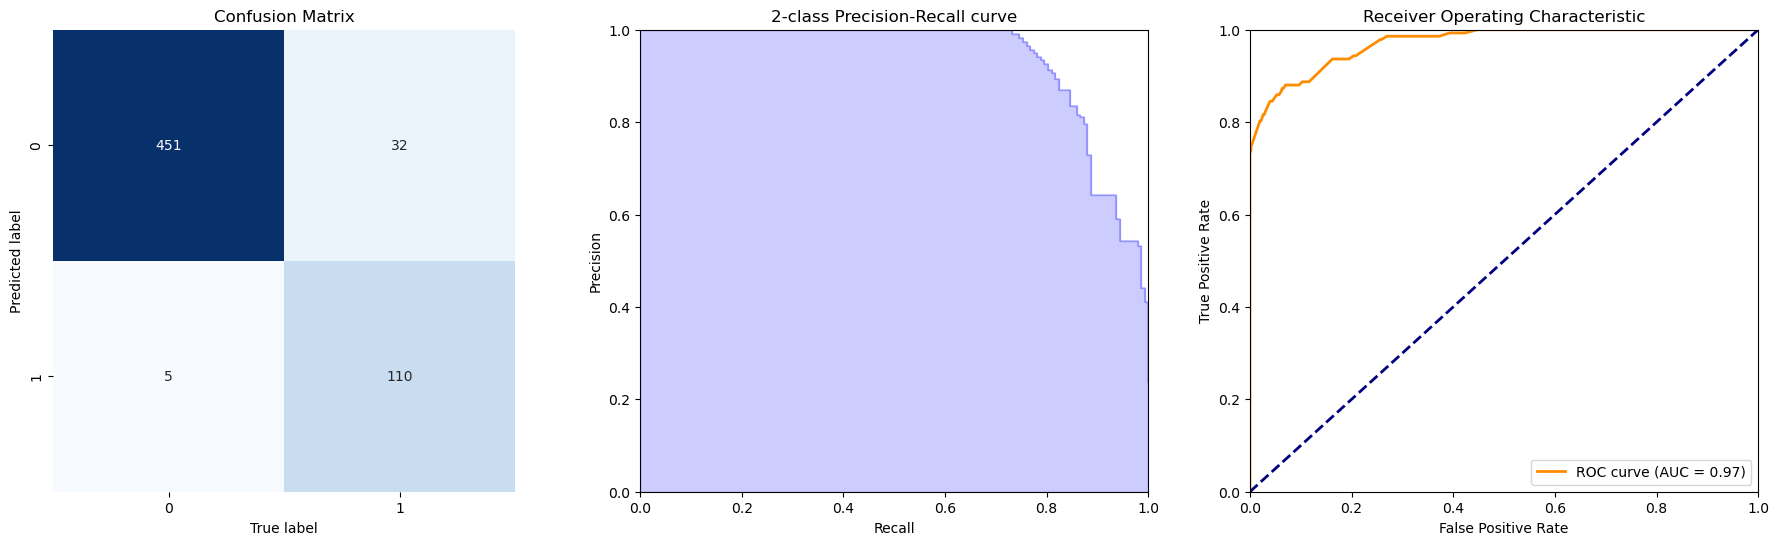

In [18]:
show_summary_report(y_train,y_train_pred)

In [19]:
y_test_pred = model.predict_proba(x_test)[:,1]

Accuracy : 0.7533 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.4828 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.3889 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.7265                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


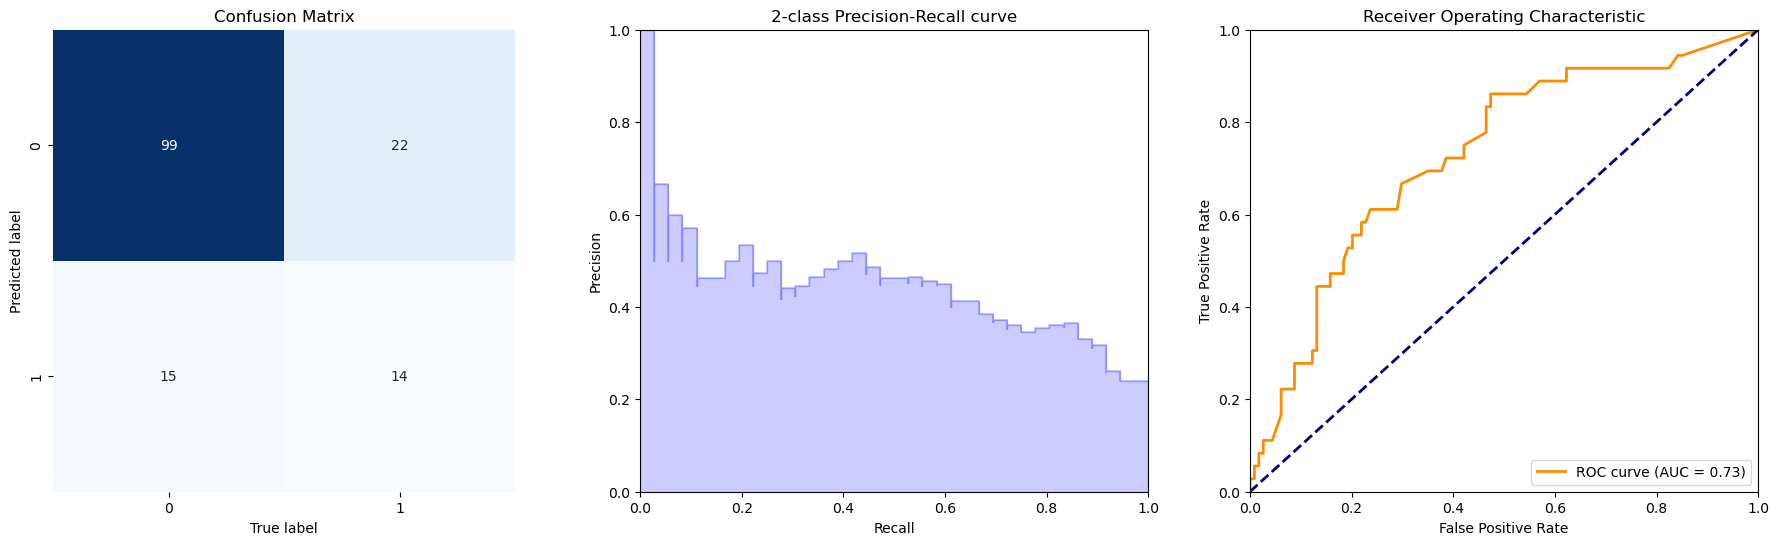

In [20]:
show_summary_report(y_test,y_test_pred)

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [ ]:
# Evaluate model against test set
#above
#compared to Decision Tree /
# Random Forest test score shows better & could boost results to show better acc.

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

>

>

>

In [ ]:
#above



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



